# Creando redes neuronales

De aqui en adelante nos adentramos en el reino del *Deep Learning*, disciplina que hace parte del *Machine Learning*, pero que se enfoca exclusivamente en el estudio y desarrollo de las redes neuronales, lo cual sera una mejora a nuestra neurona *Perceptron* que vimos al inicio del modulo de *Machine Learning*.



<img src=attachment:image.png width="500" height="100" />
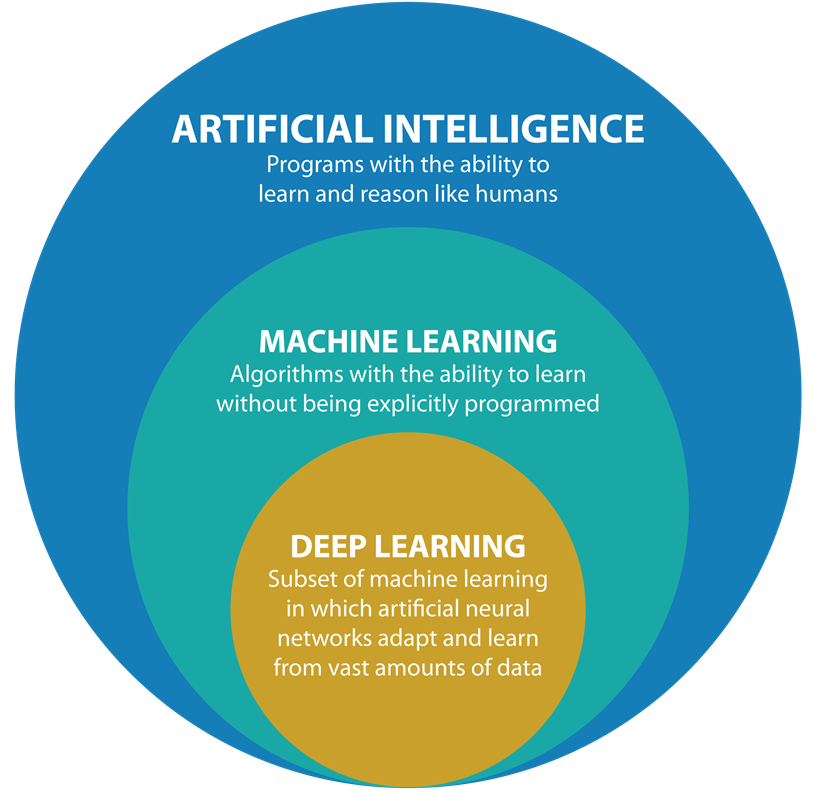

Antes de comenzar a construir nuestra primera red neuronal multicapa, vamos a repasar algunos conceptos vistos durante la implementacion de nuestra neurona artificial *Adaline*:

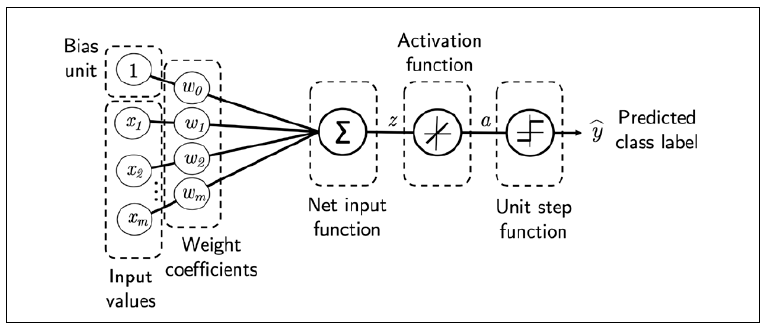

Recordemos que para optimizar los valores de los pesos utilizamos el metodo de *descenso de gradiente*, en el cual, en cada epoca, actualizabamos el vector de pesos $\vec{w}$ mediante la siguiente regla:

$$\vec{w}:=\vec{w}+\Delta \vec{w} \;\;\;\; \text{en donde   } \Delta \vec{w} = -\eta\bigtriangledown J (\vec{w})$$

es decir, computamos el gradiente con todos los valores de los pesos, y actualizamos los pesos dando un paso opuesto en la direccion del gradiente $ \bigtriangledown J (\vec{w})$. Con el fin de encontrar los pesos optimos para el modelo, minimizamos una funcion de coste objetivo, la cual definimos en aquel momento como la funcion **suma de errores cuadraticos (SSE)** $ \bigtriangledown J (\vec{w})$. Ademas, multuplicamos el gradiente por el rango de  aprendizaje $\eta$ para equilibrar la velocidad de aprendizaje contra el riesgo de superar el minimo global de la funcion de coste.

En la optimizacion del descencso del gradiente, actualizabamos todos los pesos a la vez despues de cada epoca, y definimos la derivada parcial para cada peso $w_j$ en el vector de peso $\vec{w}$ del modo siguiente:

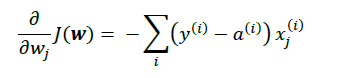

En donde, $y^{(i)}$ es la etiqueta de clase de destino de una muestra en particular $x^{(i)}$, y $a^{(i)}$ es la activacion de la neurona, una funcion lineal en el caso de Adaline. Ademas definimos la funcion de activacion $\phi$ del siguiente modo:

$$\phi(z)=z=a$$

La entrada de red $z$ es una combinacion lineal de los pesos que conectan la entrada a la capa de salida:

$$z=\sum_j w_jx_j=\vec{w}^T\vec{x}$$

Finalmente, utilizamos una funcion umbral para comprimir la salida de valor continuo a etiquetas de clase binarias:

$$\hat{y}= \left\{ \begin{array}{lcc}
             1 &   si  & g(z) \geq 0 
             \\ -1 &  \text{en otros casos}
             \end{array}
   \right.$$
   
El modelo Adaline visto se denomina, modelo de una sola capa, por su unica conexion entre la capa de entrada y la de salida.

## Arquitectura de una red multicapa

En esta parte conectaremos varia neuronas en una estructura denominada red neuronal prealimentada multicapa, tambien conocida como ***Perceptron multicapa (MLP)***; el termino prealimentada se refiere al hecho de que los valores de entrada de una capa estan determinados por la capa anterior:

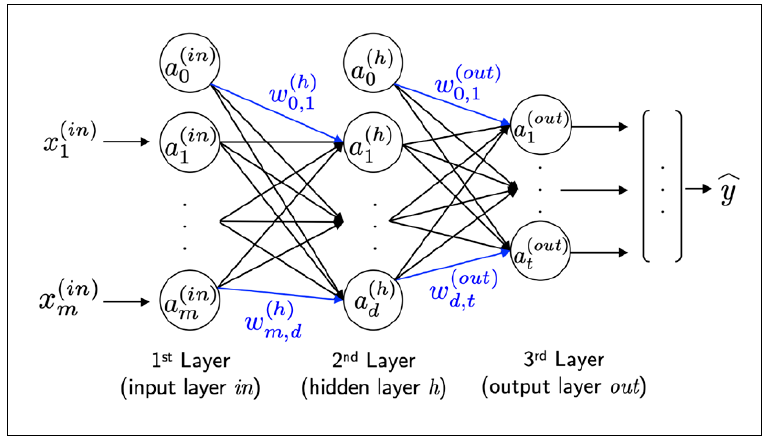

En la red de la imagen tenemos una capa de entrada, una capa oculta y una capa de salida. Todas las unidades de entrada se conectan a cada unidad de la capa oculta, y cada unidad de la capa oculta se conectan a la capa de salida. En caso de tener mas de una capa oculta, la red se denominara **red neuronal artificial profunda**.

Podemos agregar tantas capas como queramos al modelo, y podemos pensar en el numero de capas y unidades de la red como parametros a optimizar; sin embargo, el gradiente del error que se agragara mas adelante, tiende a hacerse cada vez mas pequeño a medida que se avanza por las capas; este asunto de la desaparicion del gradiente es un desafio a optimizar a la hora de construir estas redes neuronales.

En la figura anterior es muy importe entender la nomenclatura; como super indice para las unidades, siempre tendremos la capa a la que pertenece, y como subindice tendremos el numero de la unidad:

$$a^{in}_1: \text{Unidad 1 de la capa de entrada}$$

$$a^{h}_5: \text{Unidad 5 de la capa oculta}$$

$$a^{out}_t: \text{Unidad t de la capa de salida}$$

La capa de entrada siempre tendra $m$ unidades, la capa oculta tendra $d$ unidades, y la capa de salida tendra $t$ unidades.

Tambien es importante notar la existencia de las unidades de sesgo, los cuales seran fijados a 1:

$$a^{in}_0: \text{Sesgo de entrada}$$

$$a^{h}_0: \text{Sesgo de la capa oculta}$$

La activacion de las unidades de la capa de entrada es sencillamente su entrada mas la unidad de sesgo:

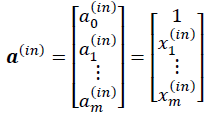

Cada unidad en la capa $l$ esta conectada a todas las unidades de la capa $l+1$ por medio de coeficiente ponderado. Por ejemplo la coneccion entre la unidad $a^{in}_0$ de la capa $in$ y la unidad $a^{h}_1$ de la capa $h$, se escribira como:
$$w^{h}_{0, 1}$$ 

La coneccion entre la unidad $a^{h}_5$ de la capa $h$ y la unidad $a^{out}_{10}$ de la capa $out$, se escribira como:

$$w^{out}_{5, 10}$$

De ahora en adelante, resumiremos los pesos que conectan las capas de entrada y oculta por medio de una matriz $\textbf{W}^{(h)} \in \mathbb R^{m\times d}$ en donde $d$ es el numero de unidades ocultas y $m$ es el numero de unidades de entrada incluyendo la unidad de sesgo.

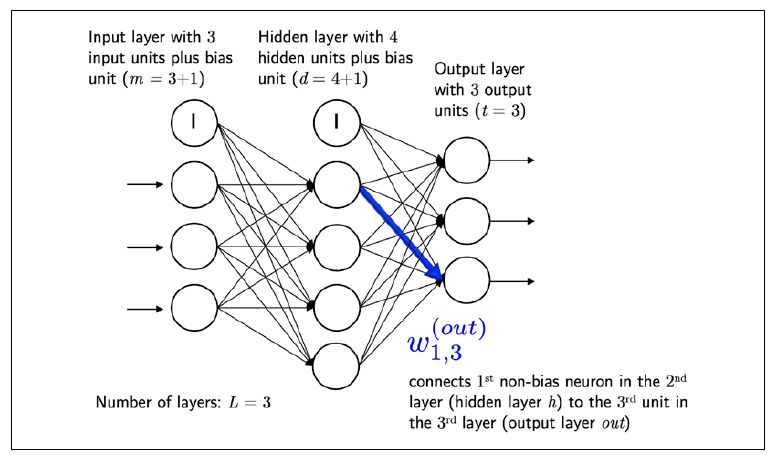

## Activar una red neuronal mediante la propagacion hacia adelante

Veremos en esta seccion como es el proceso para generar una salida de un modelo MLP, usando ***propagacion hacia adelante***. El proceso lo podemos resumir en tres simples pasos:

1. Empezando en la capa de entrada, propagamos hacia adelante los patrones de los datos de entrenamiento a traves de la red para generar una salida.

2. Basandonos en la salida de la red, claculamos el error que queremos mimimizar mediante una funcion de coste.

3. Propagamos hacia adelante el error, encontramos su derivada con respecto a cada peso y actualizamops el modelo. 

Despues de repetir esos pasos durante multiples epocas y aprender los pesos de MLP, utilizamos la propagacion hacia adelante para calcular la salida de la red y aplicar una funcion de umbral que obtenga las etiquetas de clase predichas en una representacion *one-hot*.

Veamos los pasos anteriores por separado, con la intencion de producir una salida; estos representaran el fundamento de los pasos que llevaremos luego al lenguaje de programacion:

Primero claculemos el parametro de entrada de la capa $a_1^{(h)}$:

$$z_1^{(h)}=a_0^{(in)}w_{0,1}^{(h)}+a_1^{(in)}w_{1,1}^{(h)}+\dots +a_m^{(in)}w_{m,1}^{(h)}$$

y su activacion sera:

$$a_1^{(h)}=\phi\big ( z_1^{(h)} \big)$$

$\phi$ es la funcion de activacion, utilizada para aprender los pesos que conectan a las neuronas; esta funcion debe ser diferenciable pues se le aplicara el descenso del gradiente; ademas, para resolver problemas complejos, es necesario utilizar funciones de activacion no lineales, y en este punto nos alejamos del modelo *Adaline*.

Una funcion valida puede ser la funcion sigmoide vista en la seccion de Machine Learning: clasificacion con regresion logistica:

$$\phi(z)=\frac{1}{1+e^{-z}}$$

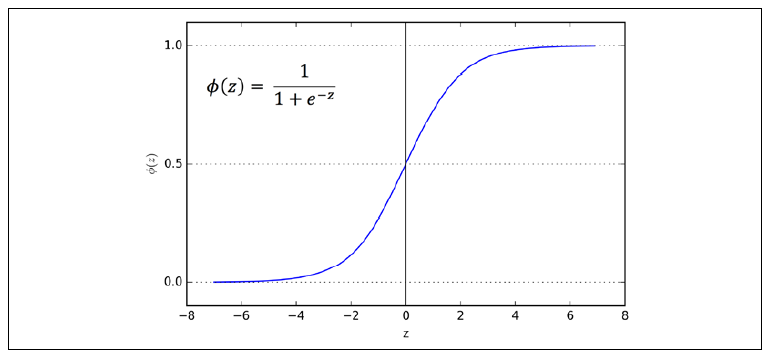

Por lo tanto pensaremos en las neuronas del MLP como unidades de regresion logistica que devuelve valores en los rango continuos entre 0 y 1.



El proceso de calcular la entrad de red $z$ visto anteriormente, junto con la aplicacion de la funcion de activacion, debe ser realizado para cada valor de entrada, y para cada neurona de la capa oculta, asi como de capas subsecuentes...ya se podran imaginar que la forma de calcular esto es con bucles tipo `for`, y que al ser tantos elementos, mas grandes seran estos ciclos. Esto definitavamente es muy poco practico y demasiado costoso computacionalmente, por lo tanto se recurre usualmente a un metodo llamado **vectorizacion**, que consiste en no tratar los datos y los parametros de red de forma indivivual, sino como matrices, y aprovecharnos de la libreria Numpy, la cual esta optimizada para calculos matriciales.

Entonces, en estos terminos, replanteamos las ecuaciones anteriores:

$$\vec{z}^{(h)}=\vec{a}^{(in)}\matrix{W}^{(h)}$$

$$\vec{a}^{(h)}=\phi\big ( \vec{z}^{(h)} \big )$$

$\vec{a}^{(in)}$ es nuestro vector de caracteristicas de dimensiones $1\times m$ incluyendo a la unidad de sesgo.

$\matrix{W}^{(h)}$ es una matriz ponderada de dimensiones $m \times d$, donde $d$ es el numero de unidades de la capa oculta. 

<img src=attachment:image.png width="500" height="100" />
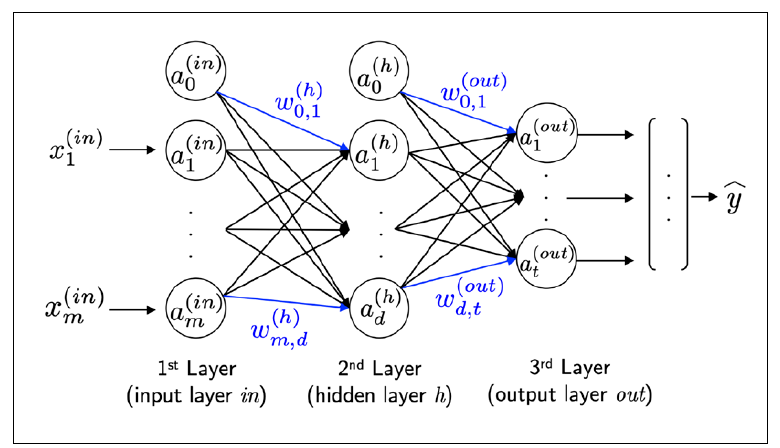

Despues de realizar la multiplicacion de matriz por vector obtenemos:

$\vec{z}^{(h)}$ es nuestro vector de entrada de red de dimensiones $1 \times d$, para luego obtener la activacion $\vec{a}^{(h)} \in \mathbb R^{1 \times d }$. Este ultimo calculo se puede generalizar a todas las muestras de entrenamiento, y no solo a una a la vez como se mostro hace un momento, como:

$$\matrix{Z}^{(h)}=\matrix{A}^{(in)}\matrix{W}^{(h)}$$

$\matrix{A}^{(in)}$ es una matriz $n \times m$. 

$\matrix{Z}^{(h)}$ sera tambien una matriz de dimensiones $n \times d$, llamada la matriz de entrada de red.

Por utlimo aplicamos la funcion de activacion $\phi$ a cada valor en la matriz de entrada de red, para obtener la matriz de activacion $\matrix{A}^{(h)}$ de dimensiones $n\times d$ para la siguiente capa:

$$\matrix{A}^{(h)}=\phi \big(\matrix{Z}^{(h)} \big)$$

De forma similar, podemos escribir la activacion de la capa de salida en formato vectorizado para multiples muestras como:

$$\matrix{Z}^{(out)}=\matrix{A}^{(h)}\matrix{W}^{(out)}$$

La matriz $\matrix{W}^{(out)}$ tiene dimensiones $d \times t$ ($t$ es el numero de unidades de salida.

La matriz $\matrix{A}^{(h)}$ tiene dimesiones $n \times d$

La matriz $\matrix{Z}^{(out)}$ tiene dimensiones $n \times t$ (las columnas en esta matriz representan las salidas para cada muestras.

Por ultimo, aplicamos la funcion de activacion sigmoide para obtener la salidad de valor continua de nuestra red:

$$\matrix{A}^{(out)}=\phi \big(\matrix{Z}^{(out)} \big)$$

La matriz $\matrix{A}^{(out)}$ tiene dimesiones $n \times t$.

## Ejemplo clasificacion de digitos manuscritos

Vamos a resolver uno de los problemas mas interesantes y de actual desafio para los que trabajamos en ciencias de datos con deep learning; cabe anotar que el tema de actualizar pesos en la red neuronal aun no termina, pues el algoritmos esta incompleto, a pesar de lo feo y largo que pudo parecer, pero por ahora, concentremonos en este tema.

Profundizar en los conceptos previos en: https://www.deeplearningbook.org/

### Obteniendo el conjunto de datos MNIST

El conjunto de datos MNIST está disponible públicamente en http://yann.lecun.com/exdb/mnist/
y consta de las siguientes cuatro partes:
* Conjunto de imagenes de entrenamiento: `train-images-idx3-ubyte.gz` (9,9 MB, 47 MB descomprimido y 60.000 ejemplos)

* Conjunto de datos de entrenamiento: `train-labels-idx1-ubyte.gz` (29 KB, 60 KB descomprimido y 60,000 etiquetas)

* Conjunto de imagenes de prueba: `t10k-images-idx3-ubyte.gz` (1.6 MB, 7.8 MB descomprimido y 10,000 ejemplos)

* Conjunto de datos de prueba: `t10k-labels-idx1-ubyte.gz` (5 KB, 10 KB descomprimido y 10,000 etiquetas)

El conjunto de datos del MNIST se construyó a partir de dos conjuntos de datos del Instituto Nacional de Estándares y Tecnología de EE. UU. (NIST). El conjunto de datos consta de dígitos escritos a mano de 250 personas diferentes, 50 por ciento de estudiantes de secundaria y 50 por ciento de empleados de la Oficina del Censo. Tenga en cuenta que el conjunto de datos de prueba contiene dígitos escritos a mano de diferentes personas que siguen la misma división.

Los archivos ya fueron descargados y descomprimidos en la carpeta de esta semana, en la subcarpeta mnist.

In [2]:
# Definiendo funcion de ayuda de carga de datos
        # https://numpy.org/doc/stable/user/basics.types.html
        # https://www.binaryconvert.com/
        # https://www.peko-step.com/es/tool/tfcolor.html
# =========================================================================
import os
import struct
import numpy as np
 
def load_mnist(path, kind='train'):
    """cargar MNIST data desde `path`"""
    labels_path = os.path.join(path, f'{kind}-labels.idx1-ubyte')
    # os.path.join une dos rutas diferentes separandolas con \
    images_path = os.path.join(path, f'{kind}-images.idx3-ubyte')
    
    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8)) # Big-endian I int unsigned
        labels = np.fromfile(lbpath, dtype=np.uint8) # Construye un arreglo desde un archivo de texto o binario
        
    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784) #28x28
        #print(images[10])
        images = ((images / 255.) - .5) * 2
        #print(images[10])

    return images, labels

#load_mnist(directory, kind='train');

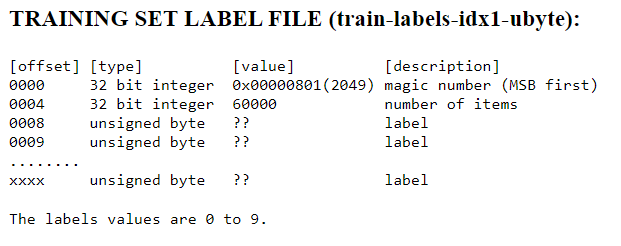

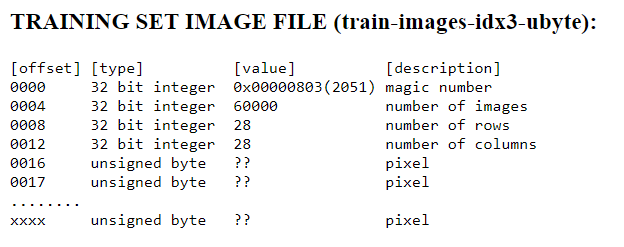

La anterior funcion esta llena de complejidades propias del lenguaje python, y relacionada con lo complejo de nuestros archivos. Para ampliar la informacion, se puede recurrir al articulo https://en.wikipedia.org/wiki/Endianness y a la pagina https://docs.python.org/3/library/os.path.html.

Aparte de lo anterior, nuestra funcion retornara dos matrices: la primera es una matriz de numpy de dimensiones $n \times m$ (`images`), donde $n$ es el numero de muestras y $m$ es el numero de caracteristicas (pixeles). El conjunto de datos de entranamiento consiste en 60000 digitos de entrenamiento y el conjunto de prueba cuenta con 10000 muestras. Las imagenes del conjunto de datos constan de 28X28 pixeles y cada pixel esta representado por un valor de intensidad de escala de grises. En este caso, desenrrollaremos los 28x28 pixeles en vectores de filas de una dimension, que representan las filas de nuestra matriz `images` (784 por fila o imagen). La segunda matriz (`labels`) contiene la correspondiente variable de destino, las etiquetas de clase (enteros de 0-9) de los digitos manuscritos.

In [3]:
# Cargando los datos de entrenamiento: archivos con prefijo train
# ====================================================================
directory = os.getcwd() + "\\mnist"
X_train, y_train = load_mnist(directory, kind='train')
print(f'Rows: {X_train.shape[0]}, columns: {X_train.shape[1]}')

Rows: 60000, columns: 784


In [4]:
X_test, y_test = load_mnist(directory, kind='t10k')
print(f'Rows: {X_test.shape[0]}, columns: {X_test.shape[1]}')

Rows: 10000, columns: 784


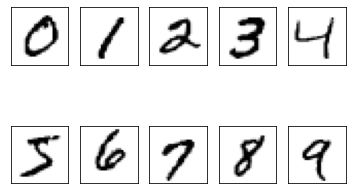

In [5]:
# Visualizar algunos de los elementos de X_train
# ===========================================================
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([]);

Introduzca un numero de 0 a 9: 3


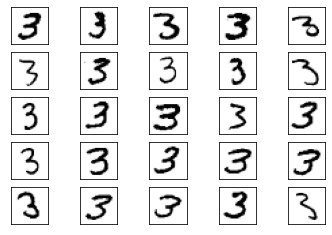

In [6]:
# Visualizando 25 diferentes versiones del numero pedido de 0 a 9
# =====================================================================
fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
number = int(input("Introduzca un numero de 0 a 9: "))
for i in range(25):
    img = X_train[y_train == number][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_xticks([])
ax[0].set_yticks([]);

###### <span class="girk">Un parentesis sobre el rendimiento</span>

Es probable que al consultar en otras fuentes no encontremos con alternativas mas rapidas para almacenar imagenes como las que manejamos en esta clase; es muy comun, casi una regla de practica el comprimir las imagenes antes de utlizarlas. Usaremos uno de los metodos mas eficazes para tal fin, el cual se basa en Numpy, si embargo esto es solo un parentesis pues no es un requisito para nuestro algoritmo.</div><i class="fa fa-lightbulb-o "></i>

In [7]:
# Guardando las imagenes en archivos comprimidos para acelerar su carga
# =================================================================================
import numpy as np

np.savez_compressed('mnist_scaled.npz', X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test)

In [8]:
# Cargando los archivos comprimidos
# ====================================================
mnist = np.load('mnist_scaled.npz')
mnist.files

['X_train', 'y_train', 'X_test', 'y_test']

In [9]:
# Accediendo a una de las matrices
# =============================================
X_train = mnist['X_train']

# o todo de una vez

X_train, y_train, X_test, y_test = [mnist[f] for f in ['X_train', 'y_train', 'X_test', 'y_test']]

In [10]:
X_train.shape[1]

784

## Implementando el perceptron multicapa

Ahora si, con los datos ya cargados, y con todo listo para trabajar, crearemos un perceptron multicapa para nuestro conjunto de datos. Se implementara un modelo MLP con una capa de entrada, una oculta y una de salida. Se incluiran algunas partes no vistas, como por ejemplo la propagacion hacia atras, que servira de introduccion a esos temas para mas adelante.

Para tener en cuenta, usaremos los siguientes parametros dentro del codigo:

* **l2**: Parametro equivalente a $\lambda$ en el proceso de regularizacion L2, utilizado para regular el sobreajuste.
* **epochs**: Numero de pasos sobre el conjunto de entrenamiento.
* **shuffle**: Para mezclar el conjunto de entrenamiento antes de cada epoca y prevenir que el algoritmo se quede atascado haciendo circulos.
* **seed**: Disposicion aleatoria para mezclar y ponderar la inicializacion.
* **minibatch_size**: Numero de muestras de entrenamiento en cada minilote; aqui se dividiran los datos en minilotes de datos para acelerar el procesado de los mismos, ya que el gradiente se calculara para cada minilote por separado en lugar de para todos los datos de entrenamiento.


In [11]:
import numpy as np
import sys


class NeuralNetMLP:
    """ Red neuronal - propagacion hacia adelante / Clasificador MLP

    Parametros
    ------------
    n_hidden : int (por defecto: 30)
        Numero de unidades ocultas
    l2 : float (default: 0.)
        Valor Lambda para regularizacion L2
        Si l2 = 0 no habra regularizacion. (default)
    epochs : int (default: 100)
        Numero de pasos sobre el conjunto de entrenamiento.
    eta : float (default: 0.001)
        Learning rate.
    shuffle : bool (default: True)
        MEzcla datos de entrnamiento en cada epoca si True para prevenir circulos.
    minibatche_size : int (default: 1)
        Numeor de ejemplos de entrenamiento por mini lote
    seed : int (default: None)
        Semilla aleatoria para inicializar pesos y mezclar.

    Atributos
    -----------
    eval_ : dict
      Diccionario que almacena el costo, la precision de entrenamiento
      y precision de validacion para cada epoca durante el entrenamiento.
    """
    def __init__(self, n_hidden=30, l2=0., epochs=100, eta=0.001, shuffle=True, minibatch_size=1, seed=None):

        self.random = np.random.RandomState(seed)
        self.n_hidden = n_hidden
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.shuffle = shuffle
        self.minibatch_size = minibatch_size

    def _onehot(self, y, n_classes):
        """Codifica las etiquetas en representacion one-hot

        Parametros
        ------------
        y : array, shape = [n_samples]
            Valores Target.

        Retorna
        -----------
        onehot : array, shape = (n_samples, n_labels)

        """
        onehot = np.zeros((n_classes, y.shape[0]))
        for idx, val in enumerate(y.astype(int)):
            onehot[val, idx] = 1.
        return onehot.T

    def _sigmoid(self, z):
        """Calculo de la funcion logistica(sigmoidea)"""
        return 1. / (1. + np.exp(-np.clip(z, -250, 250))) # hace que los valores esten entre -250 y 250
        # los valores mas menores a -250 seran -250 y los mayores a 250 seran 250

    def _forward(self, X):
        """Computa el paso de propagacion hacia adelante"""

        # paso 1: entrada de red de la capa oculta
        # [n_samples, n_features] dot [n_features, n_hidden]
        # -> [n_samples, n_hidden]
        z_h = np.dot(X, self.w_h) + self.b_h

        # paso 2: activacion de la capa oculta
        a_h = self._sigmoid(z_h)

        # paso 3: entrada de red de la capa de salida
        # [n_samples, n_hidden] dot [n_hidden, n_classlabels]
        # -> [n_samples, n_classlabels]

        z_out = np.dot(a_h, self.w_out) + self.b_out

        # step 4: activacion de la capa de salida
        a_out = self._sigmoid(z_out)

        return z_h, a_h, z_out, a_out

    def _compute_cost(self, y_enc, output):
        """Calcula la funcion de costo.

        Parametros
        ----------
        y_enc : array, shape = (n_samples, n_labels)
            entiquetas de clase con codificacion one-hot
        output : array, shape = [n_samples, n_output_units]
            Activacion de la capa de salida (propagacion hacia adelante)

        Retorna
        ---------
        cost : float
            Costo regularizado

        """
        L2_term = (self.l2 *(np.sum(self.w_h ** 2.) + np.sum(self.w_out ** 2.)))

        term1 = -y_enc * (np.log(output))
        term2 = (1. - y_enc) * np.log(1. - output)
        cost = np.sum(term1 - term2) + L2_term
        return cost

    def predict(self, X):
        """Etiquetas de clase de prediccion

        Parametros
        -----------
        X : array, shape = [n_samples, n_features]
            Capa de entrada con caracteristicas originales.

        Retorna:
        ----------
        y_pred : array, shape = [n_samples]
            Etiquetas de clase predichass.

        """
        z_h, a_h, z_out, a_out = self._forward(X)
        y_pred = np.argmax(z_out, axis=1)
        return y_pred

    def fit(self, X_train, y_train, X_valid, y_valid):
        """ Aprende los pesos de los datos de entrenamiento

        Parametros
        -----------
        X_train : array, shape = [n_samples, n_features]
            Capa de entrada con caracteristicas originales
        y_train : array, shape = [n_samples]
            Etiquetas de clase target
        X_valid : array, shape = [n_samples, n_features]
            Muestra de caracteristicas para validacion durante el entrenamiento
        y_valid : array, shape = [n_samples]
            Etiquetas de clase de muestra para validacion

        Returna:
        ----------
        self

        """
        n_output = np.unique(y_train).shape[0]  # numero de etiquetas de clase
        n_features = X_train.shape[1]

        ########################
        # Inicializacion de los pesos
        ########################

        # pesos para input -> hidden
        self.b_h = np.zeros(self.n_hidden)
        self.w_h = self.random.normal(loc=0.0, scale=0.1, size=(n_features, self.n_hidden)) 

        # pesos para hidden -> output
        self.b_out = np.zeros(n_output)
        self.w_out = self.random.normal(loc=0.0, scale=0.1, size=(self.n_hidden, n_output))

        epoch_strlen = len(str(self.epochs))  # para el formato de progrese
        self.eval_ = {'cost': [], 'train_acc': [], 'valid_acc': []}

        y_train_enc = self._onehot(y_train, n_output)

        # iteracion sobre epocas de entrenamiento
        for i in range(self.epochs):

            #iteracion sobre minilotes
            indices = np.arange(X_train.shape[0])

            if self.shuffle:
                self.random.shuffle(indices)

            for start_idx in range(0, indices.shape[0] - self.minibatch_size +
                                   1, self.minibatch_size):
                batch_idx = indices[start_idx:start_idx + self.minibatch_size]

                # propagacion hacia adelante
                z_h, a_h, z_out, a_out = self._forward(X_train[batch_idx])

                ##################
                # Backpropagation
                ##################

                # [n_samples, n_classlabels]
                sigma_out = a_out - y_train_enc[batch_idx]

                # [n_samples, n_hidden]
                sigmoid_derivative_h = a_h * (1. - a_h)

                # [n_samples, n_classlabels] dot [n_classlabels, n_hidden]
                # -> [n_samples, n_hidden]
                sigma_h = (np.dot(sigma_out, self.w_out.T) *
                           sigmoid_derivative_h)

                # [n_features, n_samples] dot [n_samples, n_hidden]
                # -> [n_features, n_hidden]
                grad_w_h = np.dot(X_train[batch_idx].T, sigma_h)
                grad_b_h = np.sum(sigma_h, axis=0)

                # [n_hidden, n_samples] dot [n_samples, n_classlabels]
                # -> [n_hidden, n_classlabels]
                grad_w_out = np.dot(a_h.T, sigma_out)
                grad_b_out = np.sum(sigma_out, axis=0)

                # REgularizacion y actualizacion de los pesos
                delta_w_h = (grad_w_h + self.l2*self.w_h)
                delta_b_h = grad_b_h # el sesgo no se regulariza
                self.w_h -= self.eta * delta_w_h
                self.b_h -= self.eta * delta_b_h

                delta_w_out = (grad_w_out + self.l2*self.w_out)
                delta_b_out = grad_b_out  # el sesgo no se regulariza
                self.w_out -= self.eta * delta_w_out
                self.b_out -= self.eta * delta_b_out

            #############
            # Evaluacion
            #############

            # Evaluacion despues de cada epoca de entrenamiento
            z_h, a_h, z_out, a_out = self._forward(X_train)
            
            cost = self._compute_cost(y_enc=y_train_enc,
                                      output=a_out)

            y_train_pred = self.predict(X_train)
            y_valid_pred = self.predict(X_valid)

            train_acc = ((np.sum(y_train == y_train_pred)).astype(np.float) /
                         X_train.shape[0])
            valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
                         X_valid.shape[0])

            sys.stderr.write('\r%0*d/%d | Cost: %.2f | Train/Valid Acc.: %.2f%%/%.2f%% ' %
                             (epoch_strlen, i+1, self.epochs, cost, train_acc*100, valid_acc*100))
            sys.stderr.flush()

            self.eval_['cost'].append(cost)
            self.eval_['train_acc'].append(train_acc)
            self.eval_['valid_acc'].append(valid_acc)

        return self

In [12]:
# Construccion de la neurona
# ===============================================
nn = NeuralNetMLP(n_hidden=100,  l2=0.01,  epochs=200,  eta=0.0005, minibatch_size=100,  shuffle=True, seed=1)

In [13]:
# Entrenamiento de los datos con el metodo fit
# fit(self, X_train, y_train, X_valid, y_valid)
# ===============================================
nn.fit(X_train = X_train[:55000], y_train = y_train[:55000], X_valid = X_train[55000:], y_valid = y_train[55000:])

200/200 | Cost: 5065.78 | Train/Valid Acc.: 99.28%/97.98%  

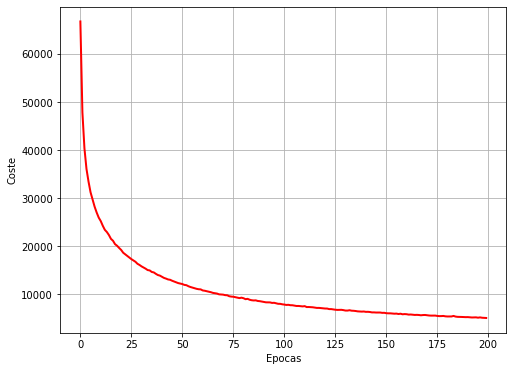

In [14]:
# Grafica del costo en funcion de las epocas
# ==============================================
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(range(nn.epochs), nn.eval_['cost'], linewidth = 2, color = 'r')
ax.set_ylabel('Coste')
ax.set_xlabel('Epocas')
ax.grid()

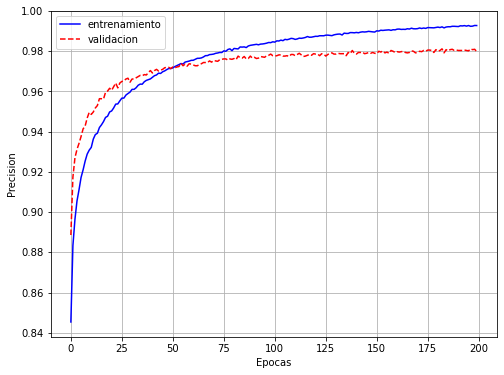

In [15]:
# Evaluacion del sobreajuste
# =====================================================
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(range(nn.epochs), nn.eval_['train_acc'], label='entrenamiento', color = 'b')
ax.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validacion', linestyle='--', color = 'r')
ax.set_ylabel('Precision')
ax.set_xlabel('Epocas')
plt.legend()
ax.grid();

In [16]:
# Rendimiento en el conjunto de prueba
# ===================================================
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])

print('Precision de prueba: %.2f%%' % (acc * 100))

Precision de prueba: 97.54%


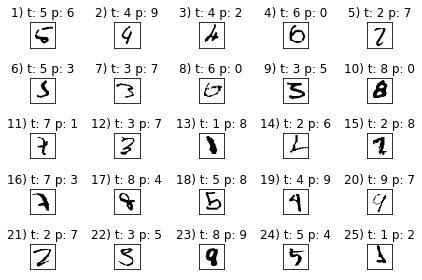

In [17]:
# Imagenes que dan problemas al algoritmo
# ======================================================
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab = y_test_pred[y_test != y_test_pred][:25]

fig, ax = plt.subplots(nrows=5, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()
for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d' % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout();

<div class="burk">
EJERCICIO</div><i class="fa fa-lightbulb-o "></i>


Use el archivo sonar.csv para realizar una clasificacion de los datos segun la ultima columna, usando dos algoritmos diferentes: el visto en esta clase, y el algoritmo SVC de sklearn con kernel gaussiano. Compare sus rendimientos.

In [19]:
import pandas as pd
datos = pd.read_csv('sonar.csv', header = None)
datos = pd.get_dummies(datos, drop_first = True)
datos.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60_R
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,1
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,1
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,1
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,1
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,1


In [20]:
X = datos.iloc[:,0:60].values
y = datos['60_R']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [51]:
# Construccion de la neurona
# ===============================================
nn = NeuralNetMLP(n_hidden=110,  l2=0.01,  epochs=350,  eta=0.05, minibatch_size=30,  shuffle=True, seed=1)

In [52]:
# Entrenamiento de los datos con el metodo fit
# fit(self, X_train, y_train, X_valid, y_valid)
# ===============================================
nn.fit(X_train = X_train[:150], y_train = y_train[:150], X_valid = X_train[150:], y_valid = y_train[150:])

<ipython-input-11-d061bf40fd8d>:234: RuntimeWarning: invalid value encountered in double_scalars
  valid_acc = ((np.sum(y_valid == y_valid_pred)).astype(np.float) /
350/350 | Cost: 45.34 | Train/Valid Acc.: 96.55%/nan%  

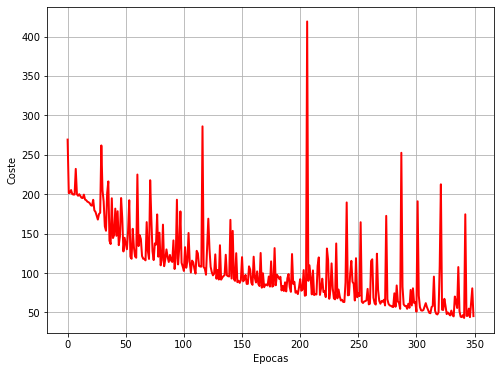

In [53]:
# Grafica del costo en funcion de las epocas
# ==============================================
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize = (8, 6))

ax.plot(range(nn.epochs), nn.eval_['cost'], linewidth = 2, color = 'r')
ax.set_ylabel('Coste')
ax.set_xlabel('Epocas')
ax.grid()

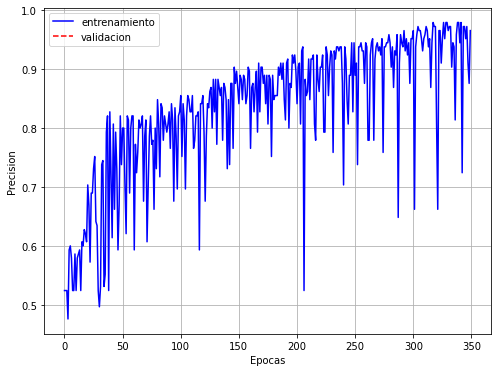

In [54]:
# Evaluacion del sobreajuste
# =====================================================
fig, ax = plt.subplots(figsize = (8, 6))
ax.plot(range(nn.epochs), nn.eval_['train_acc'], label='entrenamiento', color = 'b')
ax.plot(range(nn.epochs), nn.eval_['valid_acc'], label='validacion', linestyle='--', color = 'r')
ax.set_ylabel('Precision')
ax.set_xlabel('Epocas')
plt.legend()
ax.grid();

In [55]:
# Rendimiento en el conjunto de prueba
# ===================================================
y_test_pred = nn.predict(X_test)
acc = (np.sum(y_test == y_test_pred).astype(np.float) / X_test.shape[0])

print('Precision de prueba: %.2f%%' % (acc * 100))

Precision de prueba: 82.54%


In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [60]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.svm import SVC

pipe_svc = make_pipeline(StandardScaler(), PCA(n_components = 5),SVC())

param_range = [ 0.01, 0.1, 1, 10, 100, 1000]

param_grid = [{'svc__C': param_range, 
               'svc__gamma': param_range, 
               'svc__kernel': ['rbf']}]

gs = GridSearchCV(estimator=pipe_svc, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

0.8552380952380952
{'svc__C': 10, 'svc__gamma': 0.1, 'svc__kernel': 'rbf'}


In [61]:
clf = gs.best_estimator_
clf.fit(X_train, y_train)
print(f'Precision de prueba: {clf.score(X_test, y_test)}')

Precision de prueba: 0.8888888888888888
